In [14]:
######################################
##           EXERCISE               ##
######################################

"""
Use this air bnb new york city data set and remove outliers using
percentile based on price per night for a given apartment/home.
You can use suitable upper and lower limits on percentile based
on your intuition. Your goal is to come up with new pandas dataframe
that doesn't have the outliers present in it.

"""
import os # For getting the source of the file
import pandas as pd # Data processing and reading csv files
import numpy as np # For linear algebra
import matplotlib.pyplot as plt


df = pd.read_csv("/home/akeemlag/Downloads/archive-kaggle/AB_NYC_2019.csv")



In [4]:
df.price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

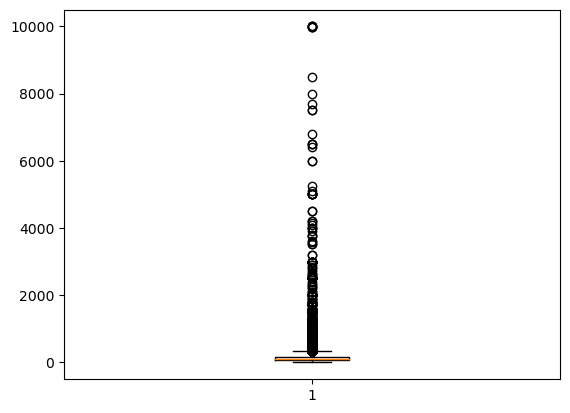

In [18]:
plt.boxplot(x=df['price']);

In [27]:
# Create a mask
df_mask = df[df["price"] <= 500]

df_mask.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47851 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47851 non-null  int64  
 1   name                            47835 non-null  object 
 2   host_id                         47851 non-null  int64  
 3   host_name                       47830 non-null  object 
 4   neighbourhood_group             47851 non-null  object 
 5   neighbourhood                   47851 non-null  object 
 6   latitude                        47851 non-null  float64
 7   longitude                       47851 non-null  float64
 8   room_type                       47851 non-null  object 
 9   price                           47851 non-null  int64  
 10  minimum_nights                  47851 non-null  int64  
 11  number_of_reviews               47851 non-null  int64  
 12  last_review                     38221

{'whiskers': [<matplotlib.lines.Line2D at 0x7682b0834050>,
 'caps': [<matplotlib.lines.Line2D at 0x7682b09e5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7682b080bd40>],
 'medians': [<matplotlib.lines.Line2D at 0x7682b097e570>],
 'fliers': [<matplotlib.lines.Line2D at 0x7682b08344d0>],
 'means': []}

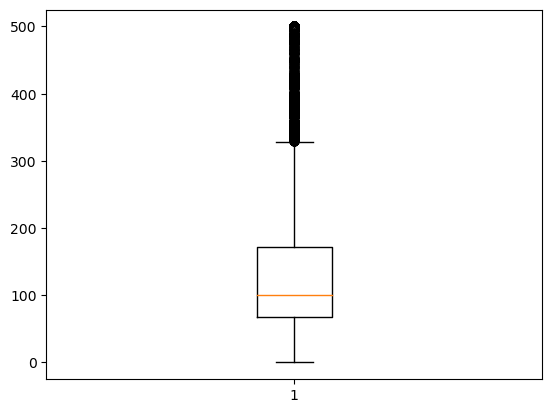

In [28]:
plt.boxplot(x=df_mask["price"])

In [46]:
# Reduce it using percentile

df_percentile = df[df["price"] < df["price"].quantile(.85)]

df_percentile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41352 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41352 non-null  int64  
 1   name                            41339 non-null  object 
 2   host_id                         41352 non-null  int64  
 3   host_name                       41332 non-null  object 
 4   neighbourhood_group             41352 non-null  object 
 5   neighbourhood                   41352 non-null  object 
 6   latitude                        41352 non-null  float64
 7   longitude                       41352 non-null  float64
 8   room_type                       41352 non-null  object 
 9   price                           41352 non-null  int64  
 10  minimum_nights                  41352 non-null  int64  
 11  number_of_reviews               41352 non-null  int64  
 12  last_review                     33579

(array([ 109., 3214., 8516., 7038., 6620., 4354., 4424., 2658., 3586.,
         833.]),
 array([  0. ,  22.4,  44.8,  67.2,  89.6, 112. , 134.4, 156.8, 179.2,
        201.6, 224. ]),
 <BarContainer object of 10 artists>)

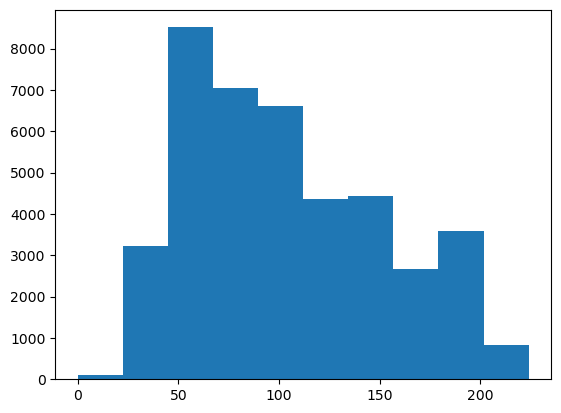

In [47]:
plt.hist(x=df_percentile["price"])

In [48]:
# Using describe method
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [49]:
# Create a min threshold and max_threshold
min_threshold, max_threshold = df["price"].quantile([0.01, 0.999])
min_threshold, max_threshold

(30.0, 3000.0)

In [51]:
# Create a dataframe from your min and max threshold

df_mask = df[(df["price"] > min_threshold) & (df["price"] < max_threshold)]

df_mask.shape

(48183, 16)

In [52]:
# Generate a random sample
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10379,7950368,Williamsburg Bedford Ave L Train,1696218,David,Brooklyn,Williamsburg,40.71870,-73.95606,Entire home/apt,500,26,9,2018-02-25,0.19,1,178
17684,13891485,Hanover Square Lux Downtown 1 Bd(C) Serviced Apt,22541573,Ken,Manhattan,Financial District,40.70358,-74.00854,Entire home/apt,270,30,0,NaN,NaN,87,190
43149,33474092,"1 Bedroom, Pvt Living Space & Bath- Till May 30th",13206448,Ruchi,Manhattan,Upper West Side,40.79908,-73.96465,Private room,50,7,2,2019-05-24,0.60,1,283
17024,13525308,Spacious Brooklyn Apt near F/G train,50995154,Bev,Brooklyn,Kensington,40.64277,-73.97440,Entire home/apt,95,2,11,2019-04-15,0.30,1,0
36354,28918134,Basement Room with Window,35927005,Kathy,Brooklyn,Borough Park,40.63525,-74.00724,Private room,48,1,0,NaN,NaN,10,365


In [54]:
# Use the describe method

df_mask.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64